# Proyek Analisis Data: Bike Sharing

    Nama: Toto Suryatmoko
    Email: to2.surya@gmail.com
    Id Dicoding: to2_surya

# Pertanyaan Bisnis:

* pertanyaan 1: Pada bulan apa dalam setahun yang paling banyak mendapatkan order bike sharing?
* pertanyaan 2: Pada musim apa dalam setahun yang paling banyak mendapatkan order bike sharing?
* pertanyaan 3: Bagaimana pengaruh cuaca (weather) terhadap total order bike riding?
* pertanyaan 4: Bagaimana korelasi antara suhu terhadap total order bike riding?

# Library yang dibutuhkan:

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 1. Data Wrangling --> Gathering Data

In [30]:
# Load Data Day

day_df = pd.read_csv('../submission_bike_sharing/data/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


# 2. Data Wrangling --> Assessing Data

In [31]:
# Memeriksa Tipe Data Tabel Day

day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [32]:
# Memeriksa apakah ada missing value pada Table Day

day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [33]:
# Memeriksa apakah ada duplikat data pada Table Day

print('Duplicate Count: ', day_df.duplicated().sum())

Duplicate Count:  0


In [34]:
# Menampilkan parameter statistik pada Table Day

day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [35]:
# Merubah tipe data pada kolom ['dteday', 'season', 'mnth', 'holiday', 'weekday', ''workingday', 'weathersit']

day_df['dteday'] = pd.to_datetime(day_df['dteday'])
day_df['season'] = day_df.season.astype('category')
day_df['mnth'] = day_df.mnth.astype('category')
day_df['holiday'] = day_df.holiday.astype('category')
day_df['weekday'] = day_df.weekday.astype('category')
day_df['workingday'] = day_df.workingday.astype('category')
day_df['weathersit'] = day_df.weathersit.astype('category')

In [36]:
# Melihat kembali tipe data yang sudah dirubah

day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    category      
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    category      
 5   holiday     731 non-null    category      
 6   weekday     731 non-null    category      
 7   workingday  731 non-null    category      
 8   weathersit  731 non-null    category      
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: category(6), datetime64

# 3. Data Wrangling --> Cleaning Data

In [37]:
# Konversi data pada kolom variabel kategoru berdasarkan kriteria yang ditunjukkan pada file Readme.txt

# Konversi nilai untuk kolom 'season' : 1:Spring, 2:Summer, 3:Fall, 4:Winter
season_col = {1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'}
day_df['season'] = day_df['season'].map(season_col)

# Konversi nilai untuk kolom 'yr' : 0:2011, 1:2012
year_col = {0:2011, 1:2012}
day_df['yr'] = day_df['yr'].map(year_col)

# Konversi nilai untuk kolom 'mnth' :  1:Jan, 2:Feb, 3:Mar, 4:Apr, 5:May, 6:Jun, 7:Jul, 8:Aug, 9:Sep, 10:Oct, 11:Nov, 12:Dec
month_col = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'June', 7:'July', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}
day_df['mnth'] = day_df['mnth'].map(month_col)

# Konversi nilai untuk kolom 'weathersit' : 1:Clear, 2:Misty, 3:Light_Snow 4:Heavy_Rain
weathersit_col = {1:'Clear', 2:'Mist', 3:'Light_Snow', 4:'Heavy_Rain'}
day_df['weathersit'] = day_df['weathersit'].map(weathersit_col)

# Konversi nilai untuk kolom 'weekday' : 0:Mon, 1:Tue, 2:Wed, 3:Thu, 4:Fri, 5:Sat, 6:Sun
weekday_col = {0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}
day_df['weekday'] = day_df['weekday'].map(weekday_col)

# Konversi nilai untuk kolom 'workingday' : 0:No, 1:Yes
working_col = {0:'Holiday', 1:'Working_Day'}
day_df['workingday'] = day_df['workingday'].map(working_col)

In [38]:
# Merubah beberapa nama kolom agar lebih mudah dibaca

day_df.rename(columns={
    "dteday" : "date",
    "yr" : "year",
    "mnth" : "month",
    "weathersit" : "weather",
    "hum" : "humidity",
    "cnt" : "counts"}, inplace=True
)

In [39]:
# Merubah nilai dari 'temp', 'atemp', 'humidity, 'windspeed' ke dalam nilai yang belum dinormalisasi berdasarkan kriteria yang ditunjukkan pada file Readme.txt

day_df['temp'] = day_df['temp'] * 41
day_df['atemp'] = day_df['atemp'] * 50
day_df['humidity'] = day_df['humidity'] * 100
day_df['windspeed'] = day_df['windspeed'] * 67

In [40]:
# Melihat kembali data yang sudah dirubah

day_df.head(10)


,instant,date,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,counts
0,1,2011-01-01,Spring,2011,Jan,0,Sun,Holiday,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2011-01-02,Spring,2011,Jan,0,Mon,Holiday,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2011-01-03,Spring,2011,Jan,0,Tue,Working_Day,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2011-01-04,Spring,2011,Jan,0,Wed,Working_Day,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2011-01-05,Spring,2011,Jan,0,Thu,Working_Day,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,2011-01-06,Spring,2011,Jan,0,Fri,Working_Day,Clear,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,2011-01-07,Spring,2011,Jan,0,Sat,Working_Day,Mist,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,2011-01-08,Spring,2011,Jan,0,Sun,Holiday,Mist,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,2011-01-09,Spring,2011,Jan,0,Mon,Holiday,Clear,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,2011-01-10,Spring,2011,Jan,0,Tue,Working_Day,Clear,6.184153,7.54440,48.2917,14.958889,41,1280,1321


# Exploratory Data Analysis (EDA)

In [41]:
# Membuat Pivot Tabel berdasarkan Season

day_df.groupby(by="season", observed=True).agg({
    "workingday": "count", 
    "windspeed": ["max", "min", "mean", lambda x: x.max() - x.min()]  
}).sort_values(by=("workingday", "count"), ascending=False)

workingday  windspeed                                
            count        max       min       mean <lambda_0>
season                                                      
Fall          188  25.166339  4.292744  11.530366  20.873595
Summer        184  26.000489  4.417256  13.634978  21.583233
Spring        181  34.000021  3.042356  14.373984  30.957665
Winter        178  28.292425  1.500244  11.523637  26.792181

In [42]:
# Membuat Pivot Tabel berdasarkan Weather

day_df.groupby(by="weather", observed=True).agg({
    "workingday": "count", 
    "windspeed": ["max", "min", "mean", lambda x: x.max() - x.min()]  
}).sort_values(by=("workingday", "count"), ascending=False)

workingday  windspeed                                
                count        max       min       mean <lambda_0>
weather                                                         
Clear             463  34.000021  1.500244  12.746926  32.499777
Mist              247  27.791600  3.167425  12.490863  24.624175
Light_Snow         21  23.999400  6.500394  16.303489  17.499006

In [43]:
#  Mendefinisikan variable pada kolom yang digunakan

cont_col = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered']
cat_col = ['season', 'year', 'month', 'holiday', 'weekday', 'workingday', 'weather']

day_df['year'] = day_df['year'].astype(str)
for col in cat_col :
  day_df[cat_col] = day_df[cat_col].astype('category')

In [44]:
# Melihat korelasi antar data

korelasi = day_df[cont_col].corr()
print(korelasi)

                temp     atemp  humidity  windspeed    casual  registered
temp        1.000000  0.991702  0.126963  -0.157944  0.543285    0.540012
atemp       0.991702  1.000000  0.139988  -0.183643  0.543864    0.544192
humidity    0.126963  0.139988  1.000000  -0.248489 -0.077008   -0.091089
windspeed  -0.157944 -0.183643 -0.248489   1.000000 -0.167613   -0.217449
casual      0.543285  0.543864 -0.077008  -0.167613  1.000000    0.395282
registered  0.540012  0.544192 -0.091089  -0.217449  0.395282    1.000000


* Univariate Analysis

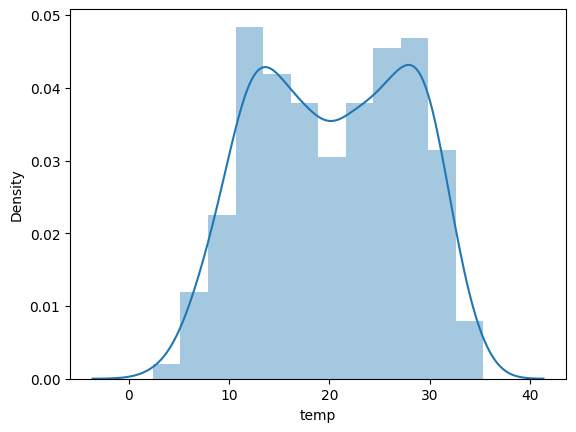

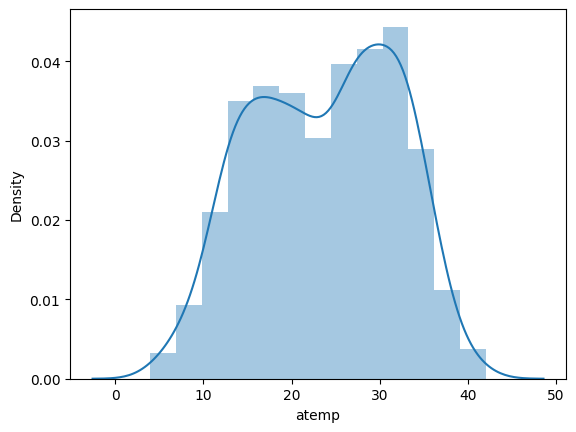

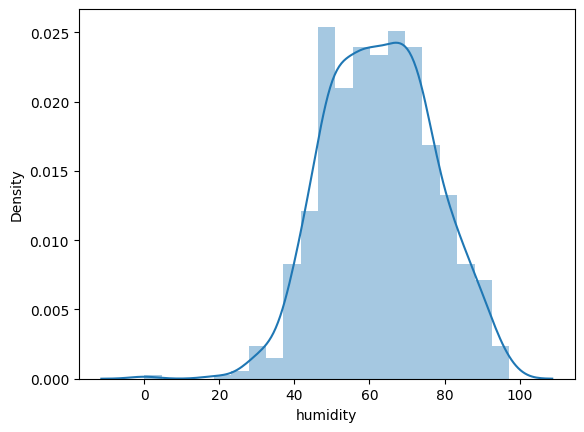

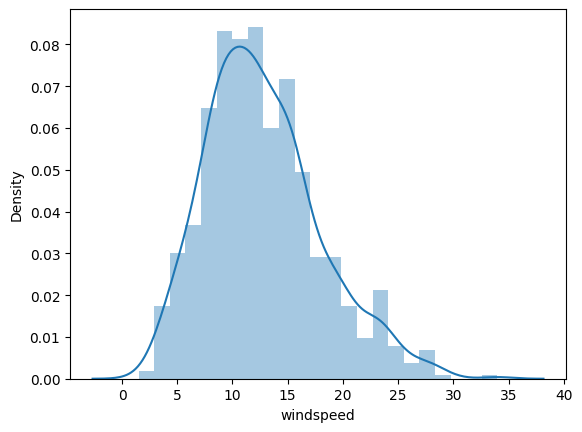

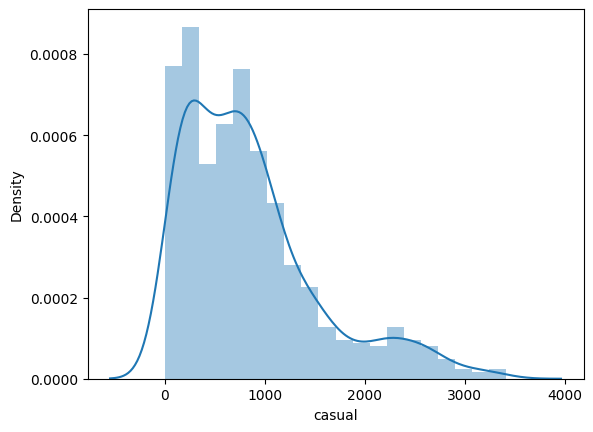

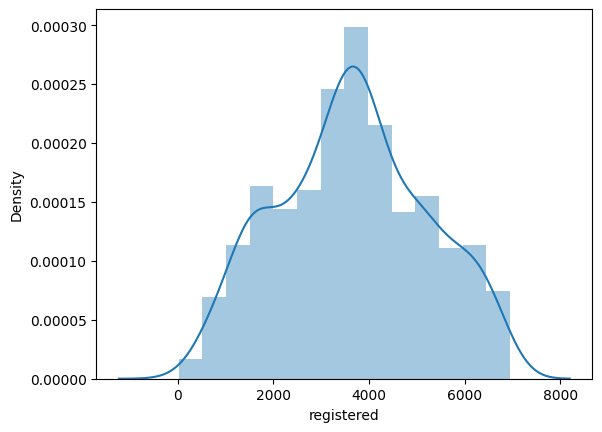

In [45]:
# Distplot

for i in cont_col:
    sns.distplot(day_df[i])
    plt.show()

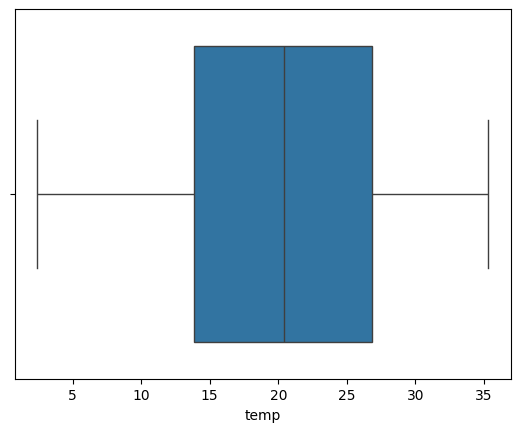

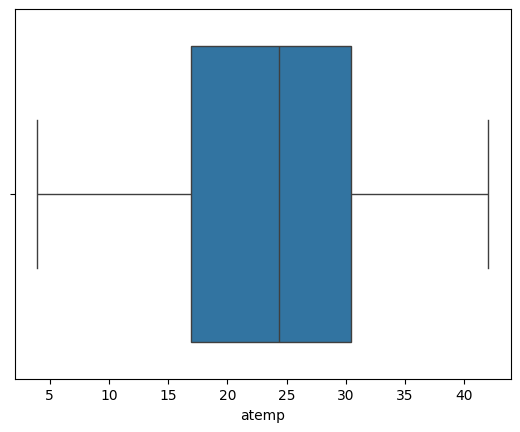

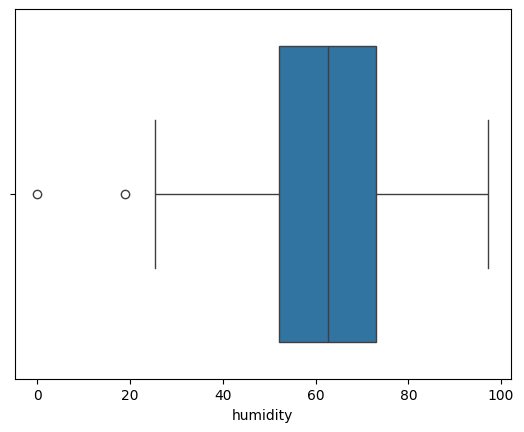

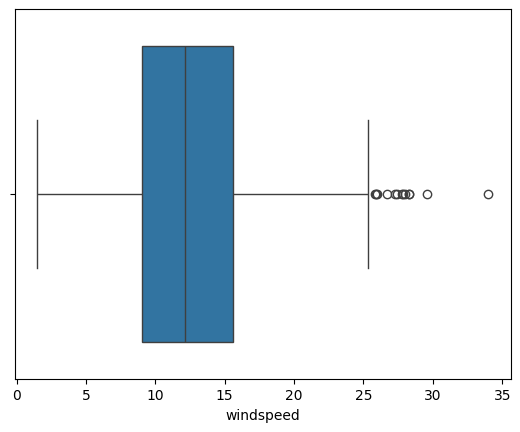

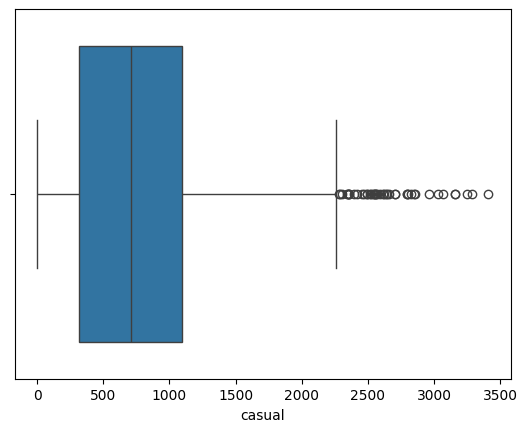

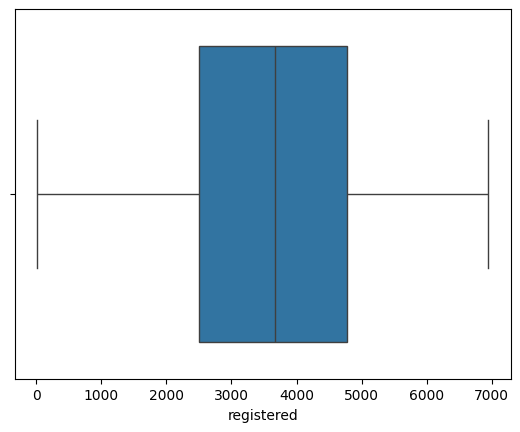

In [46]:
# Boxplot

for i in cont_col:
    sns.boxplot(x=day_df[i], orient='h')
    plt.show()

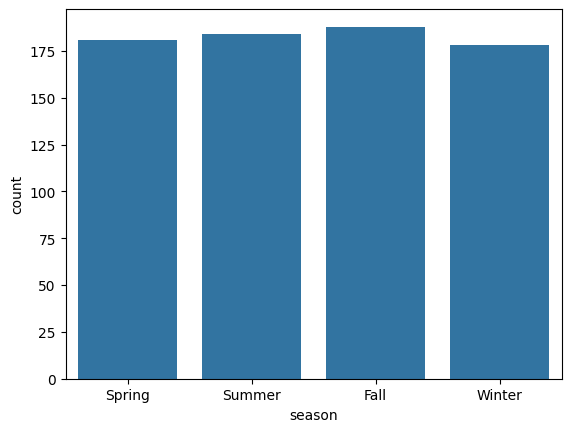

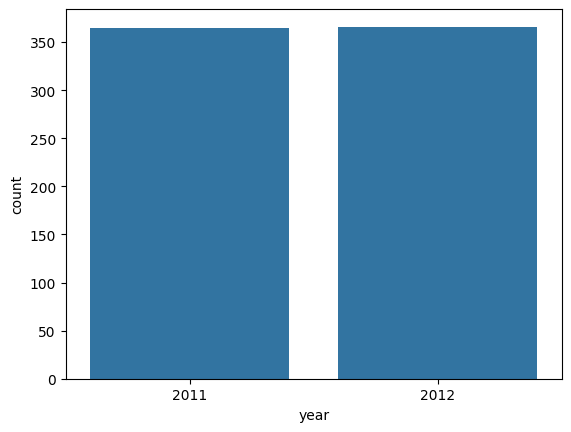

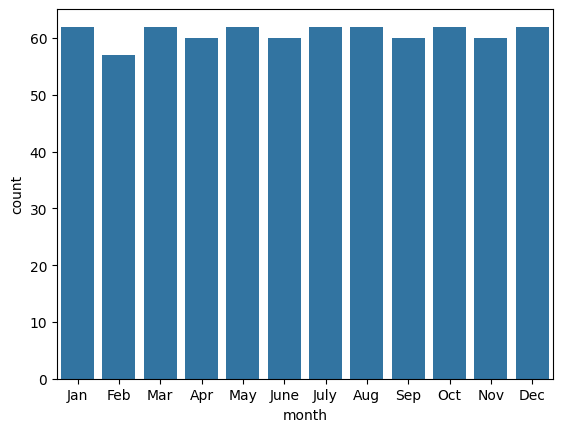

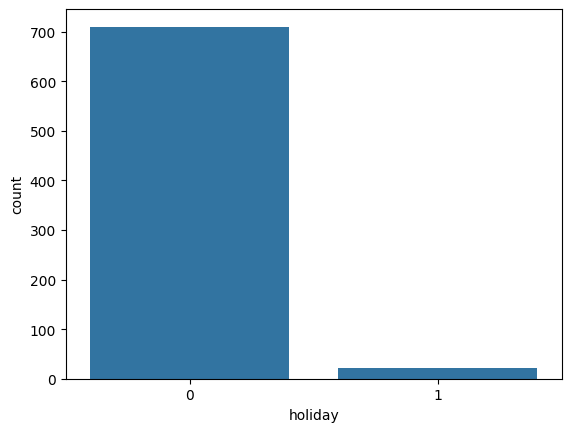

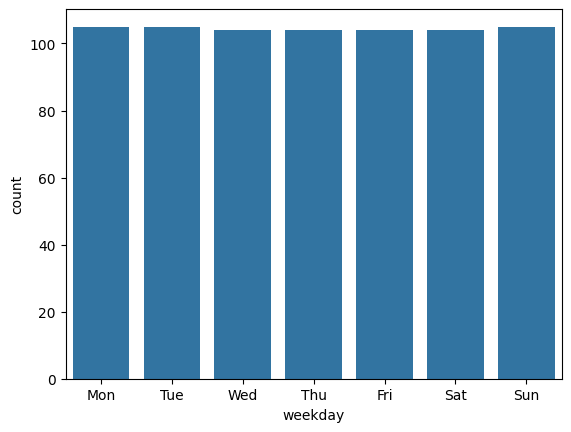

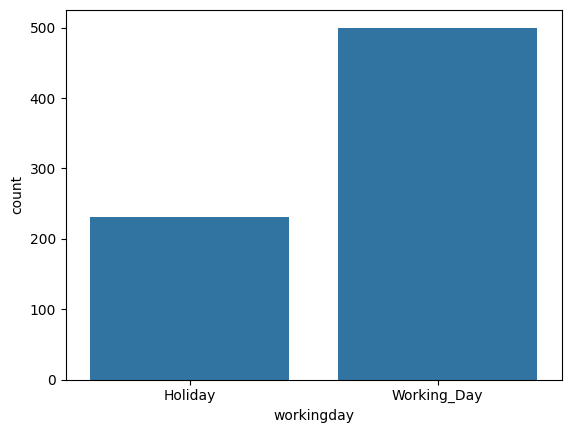

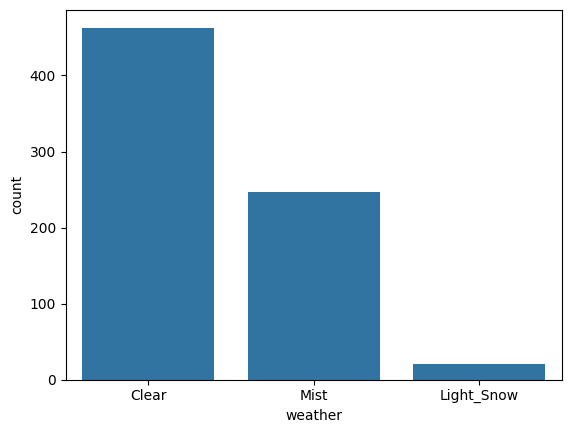

In [47]:
# Countplot

for i in cat_col:
    sns.countplot(x=day_df[i])
    plt.show()

* Bivariate Analysis

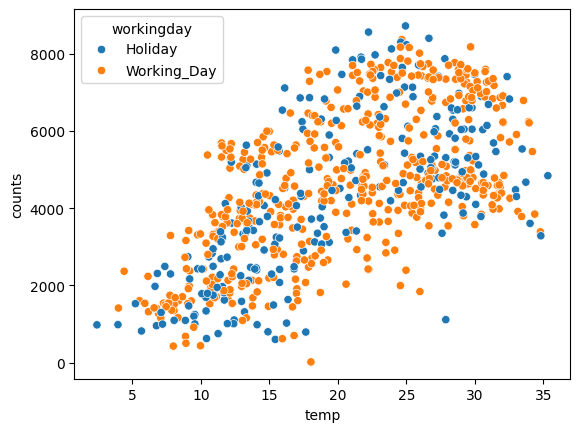

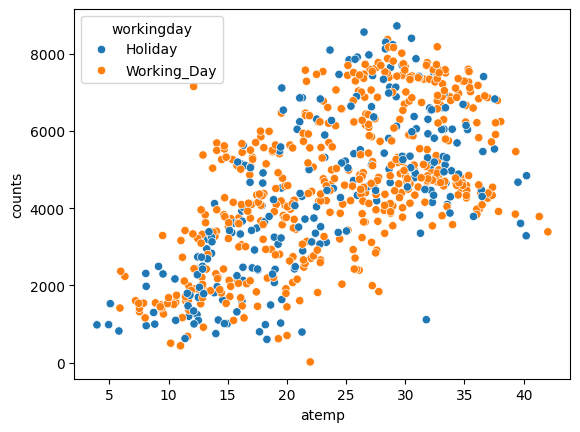

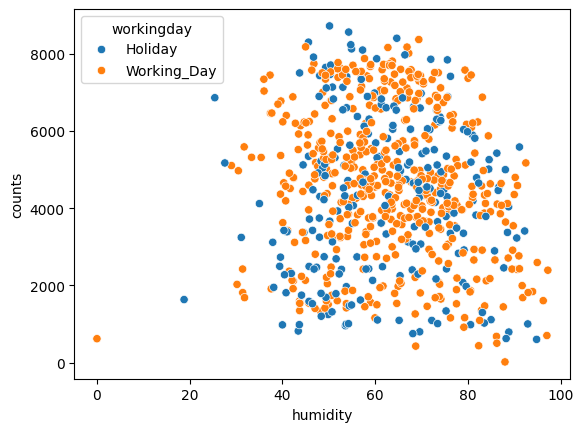

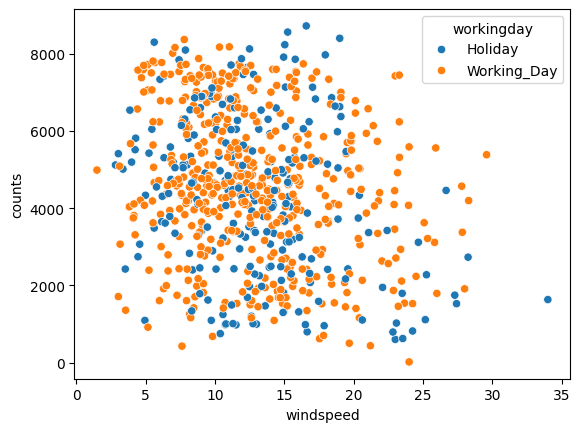

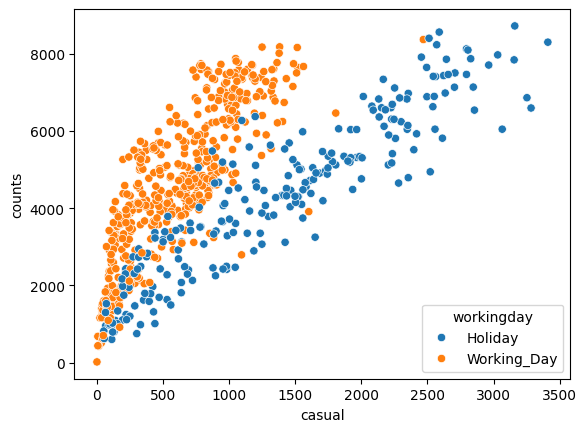

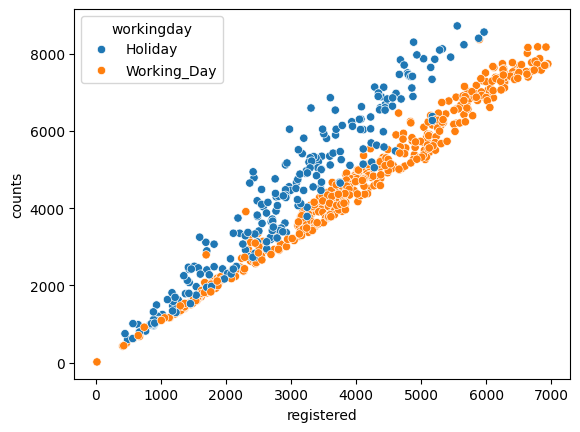

In [48]:
#Scatterplot

for i in cont_col:
    sns.scatterplot(x=day_df[i], y=day_df['counts'], hue = day_df['workingday'])
    plt.show()

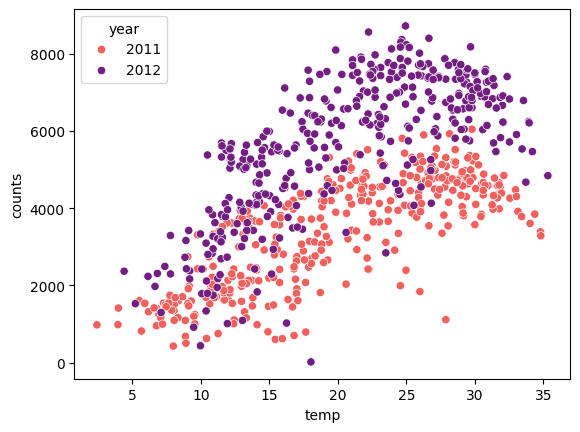

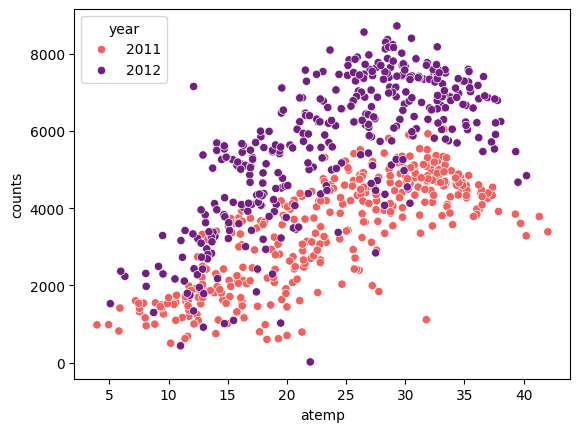

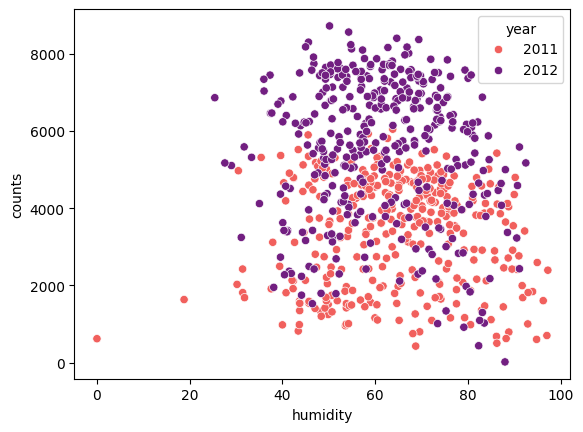

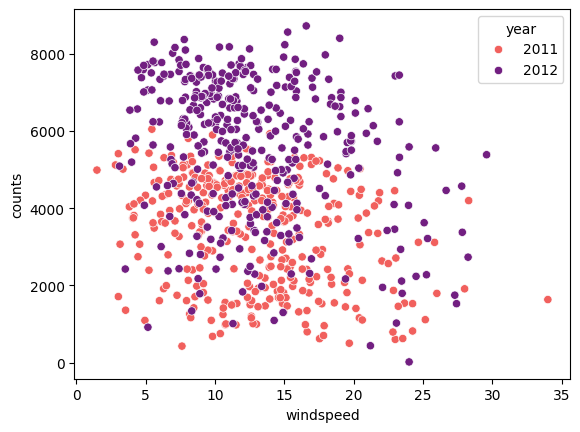

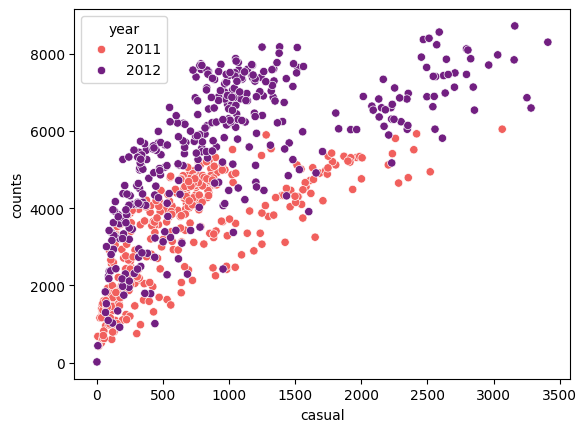

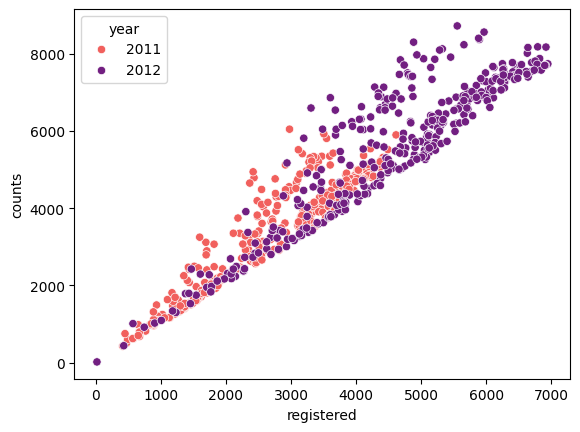

In [49]:
# Scatter Plot

for i in cont_col:
    sns.scatterplot(x=day_df[i], y=day_df['counts'], hue = day_df['year'],  palette = 'magma_r')
    plt.show()

<Axes: >

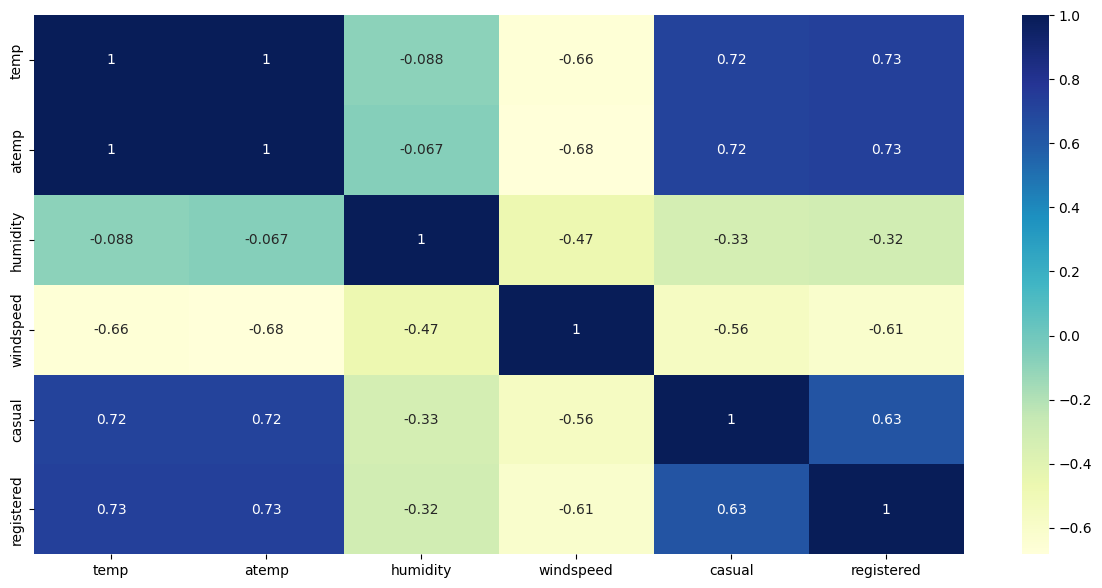

In [50]:
# Heatmap

plt.figure(figsize = (15,7))
sns.heatmap(korelasi.corr(), annot=True, cmap="YlGnBu") 

# Visualization & Explanatory Analysis

- Pada bulan apa dalam setahun yang paling banyak mendapatkan order bike sharing?

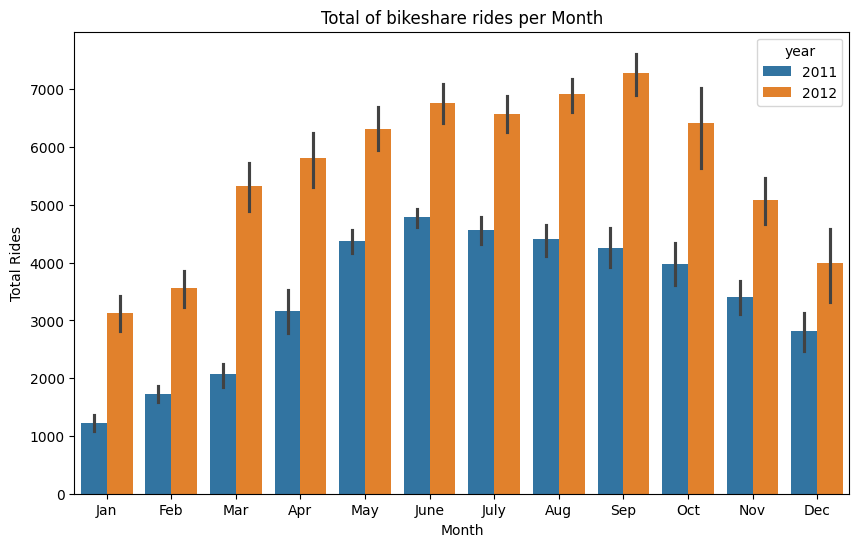

In [51]:
plt.figure(figsize=(10,6))
sns.barplot(x='month', y='counts', data=day_df, hue='year')

plt.xlabel("Month")
plt.ylabel("Total Rides")
plt.title("Total of bikeshare rides per Month")
plt.show()

- Pada musim apa dalam setahun yang paling banyak mendapatkan order bike sharing?

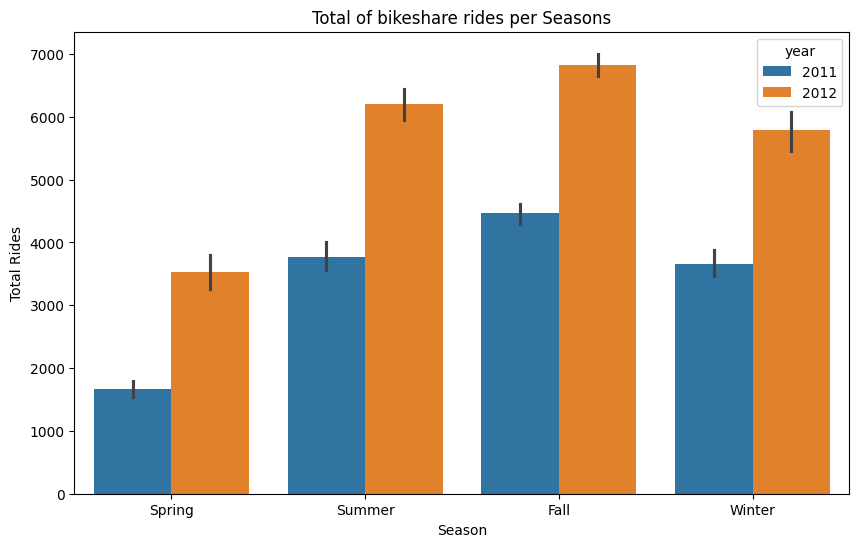

In [52]:
plt.figure(figsize=(10,6))
sns.barplot(x='season', y='counts', data=day_df, hue='year')

plt.xlabel("Season")
plt.ylabel("Total Rides")
plt.title("Total of bikeshare rides per Seasons")
plt.show()

- Bagaimana pengaruh cuaca (weather) terhadap total order bike riding?

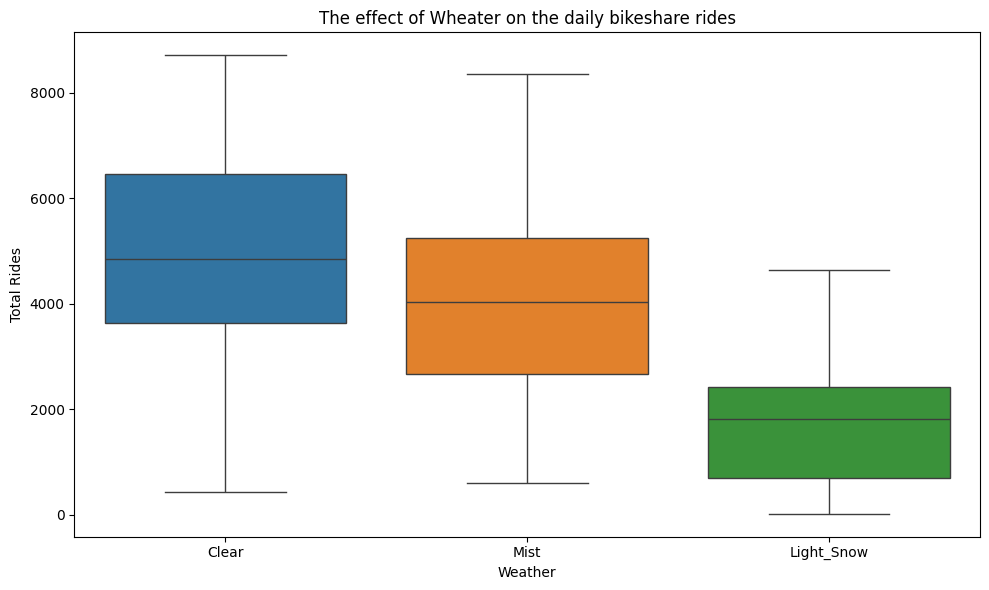

In [59]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='weather', y='counts', data=day_df, hue='weather')
plt.xlabel("Weather")
plt.ylabel("Total Rides")
plt.title("The effect of Weather on the daily bikeshare rides")
plt.tight_layout()
plt.show()

- Bagaimana korelasi antara suhu terhadap total order bike riding?

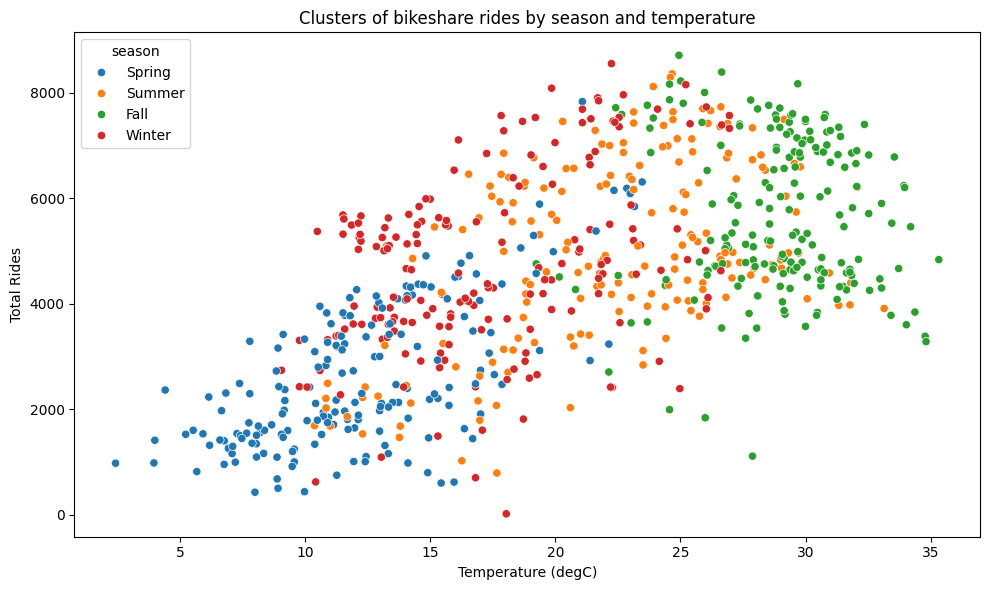

In [54]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='temp', y='counts', data=day_df, hue='season')

plt.xlabel("Temperature (degC)")
plt.ylabel("Total Rides")
plt.title("Clusters of bikeshare rides by season and temperature")
plt.tight_layout()
plt.show()

# Conclusion

* Pada bulan apa dalam setahun yang paling banyak mendapatkan order bike sharing?

Order bike riding memiliki order terbanyak pada tahun 2011 terjadi pada bulan Juni dan pada thaun 2012 terjadi pada bulan September.

* Pada musim apa dalam setahun yang paling banyak mendapatkan order bike sharing?

Order bike riding memiliki order terbanyak secara berturut turut pada tahun 2011 dan 2012 pada musim Fall.

* Bagaimana pengaruh cuaca (weather) terhadap total order bike riding?

Order bike riding mengingkat ketika cuaca Clear, Mist Weather, Light_Snow.

* Bagaimana korelasi antara suhu terhadap total order bike riding?

Permintaan akan bike riding relatif rendah pada suhu kurang dari 20 derajat Celcius.
Permintaan bike riding relatif tinggi ketika pada suhu 25-30 derajat Celcius.

In [55]:
# Export to csv file

day_df.to_csv("../submission_bike_sharing/dashboard/main_data.csv", index=False)